In [490]:
from prophet import Prophet 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [491]:

incoming_data = pd.read_csv("/Users/ahmadzarzar/Downloads/csv_hämtade_filer/incoming_packages.csv")


In [492]:
incoming_data.tail()

,date,total_packages,cooled_packages,fire_packages,normal_packages
846,2022-04-26,2268,467,503,1298
847,2022-04-27,2466,432,641,1393
848,2022-04-28,2436,545,556,1335
849,2022-04-29,2302,368,547,1387
850,2022-04-30,1270,227,331,712


In [493]:
incoming_data.shape

(851, 5)

In [494]:
incoming_data = incoming_data[['date','total_packages']]
incoming_data.head()

,date,total_packages
0,2020-01-01,1745
1,2020-01-02,1847
2,2020-01-03,1842
3,2020-01-04,664
4,2020-01-05,871


### Finns det någon trend?

Det verkar som att det definitivt finns en trend här. I det här fallet verkar det att trend som en ökning i medien

### Finns det någon säsongsvariation? I så fall, vilka?

Ja det finns det är Additive säsongsvariation, Det är ganska sällsynt att faktiska tidsserier har konstanta topp och delvärden och istället ser vi vanligtvis någon form av generell trend som en ökning eller en minskning över tiden. I vår kommandepaketsraport tenderar till exempel medianpriset att gå upp över tiden.

Om amplituden på vår säsongsvariation tenderar att förbli densamma, så har vi vad som kallas en additiv säsongsvariation. Nedan är ett exempel på en additiv säsongsvariation.

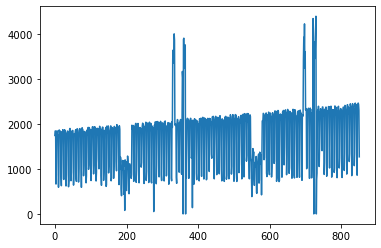

In [496]:
plt.plot(incoming_data['total_packages'])

### Finns det några dagar med extrema värden?

Ja det stämmer det finns några dagar med extrema värden som ni ser på visualiseringen nedan att det finns några dagar där värde sticker ut från de övriga annars vanligtvis de övriga dagar värde ser ganska ihopslagna ut.

<AxesSubplot:>

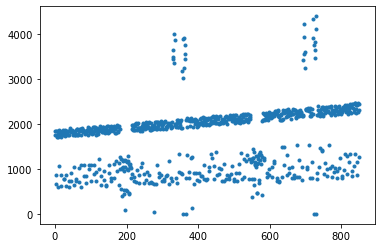

In [497]:
incoming_data['total_packages'].plot(style='.')

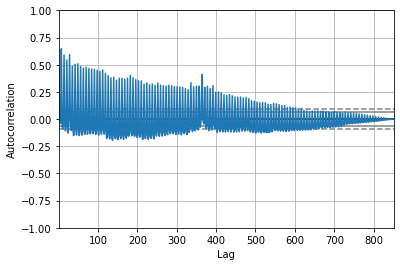

In [499]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(incoming_data[['total_packages']])
plt.show()

### Det finns spikar i november och december, vad kan det bero på?

Det kan beror på många saker men de kännda anledningar är att Fler konsumenter planerade att handla julklappar under Black Week, och Julhandeln i december växer normalt i takt med att ekonomin och befolkningen växer så det kan leda till att många som kommer att köpa, skicka, sälja, paket därför fanns spikar i antal paketen i dessa perioder.

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<function matplotlib.pyplot.show(close=None, block=None)>

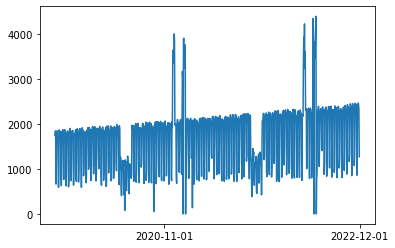

In [500]:
plt.plot(incoming_data['date'],incoming_data['total_packages'])
plt.xticks(['2020-11-01','2022-12-01'])

plt.show


### Träna en facebook prophet modell

In [501]:
model_pro= Prophet(interval_width=0.95, weekly_seasonality=False, daily_seasonality=False)
# model_pro.add_country_holidays(country_name='SE') 

In [502]:
incoming_data['ds']= incoming_data['date']
incoming_data['y']=incoming_data['total_packages']

###  Träna modellen på all data före 2022-04-01
### Testa modellen på all data från 2022-04-01 och framåt

In [503]:
# trien_data= incoming_data[incoming_data['ds'] < '2022-04-01']
# test_data=incoming_data[incoming_data['ds'] > '2022-04-01']

trien_data=incoming_data[:821]
test_data=incoming_data[821:]


In [504]:
incoming_data[['ds','y']].head()

,ds,y
0,2020-01-01,1745
1,2020-01-02,1847
2,2020-01-03,1842
3,2020-01-04,664
4,2020-01-05,871


### Hur modellen har prognostiserat träningsdatan

In [505]:
model_pro.fit(trien_data)

/Users/ahmadzarzar/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -13.5898


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      65        1210.6   0.000150869       81.0093   1.647e-06       0.001      119  LS failed, Hessian reset 
      99       1210.63   1.80181e-05       90.3557      0.3467           1      161   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     152       1210.68   3.85826e-08       99.5146      0.1714           1      233   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [506]:
future=model_pro.make_future_dataframe(periods=0)

In [507]:
forecast=model_pro.predict(future)


/Users/ahmadzarzar/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/ahmadzarzar/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


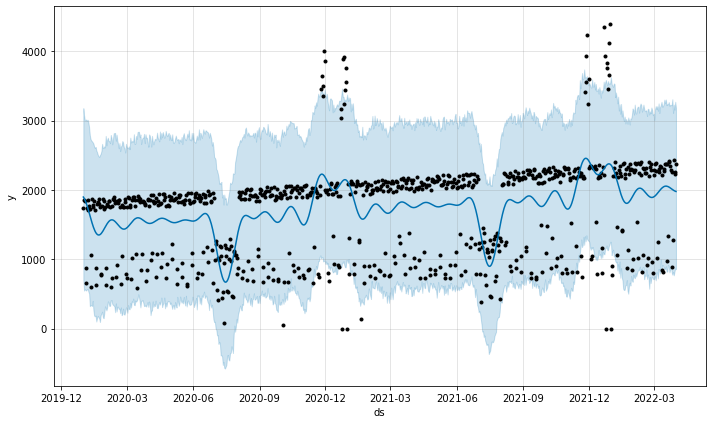

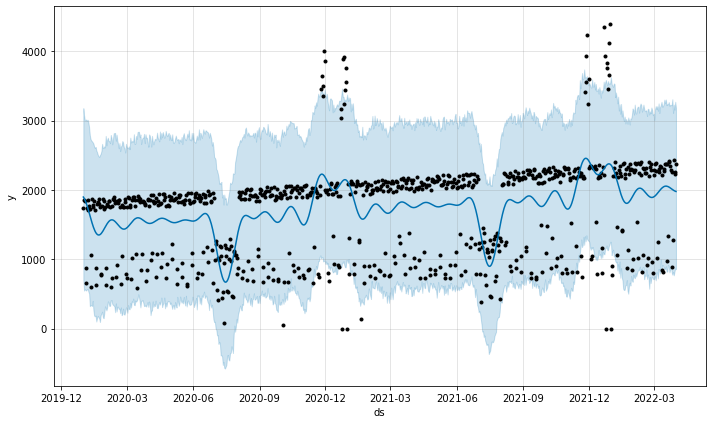

In [508]:
model_pro.plot(forecast)

## Vad ser vi i grafen?

### modellen plottar de observerade värdena för tidsserier är (svarta punkter), de prognostiserade värdena är (blå linjer) och de osäkera intervallen för våra prognoser är (blå skuggad)

## Rita ut modellens komponenter (trend och säsongsvariation)

/Users/ahmadzarzar/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


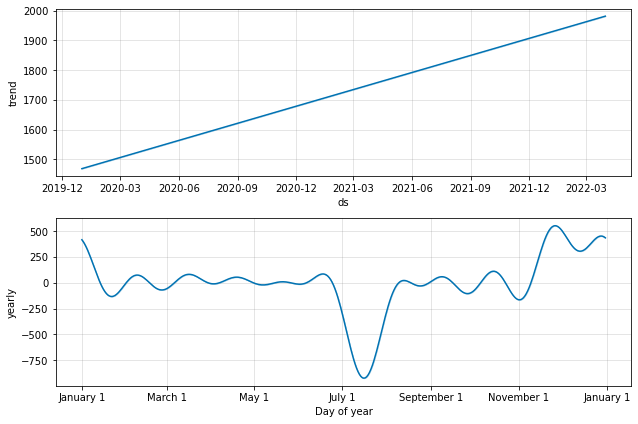

In [509]:
fig = model_pro.plot_components(forecast)

### Kör modellen mot testdatan och se om den presterar bättre än planeringen på 2000 paket om dagen.

In [524]:
pro_test=Prophet()

In [525]:
pro_test.fit(test_data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/ahmadzarzar/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:n_changepoints greater than number of observations. Using 23.


Initial log joint probability = -2.4818
Iteration  1. Log joint probability =    18.3237. Improved by 20.8055.
Iteration  2. Log joint probability =    19.2828. Improved by 0.959125.
Iteration  3. Log joint probability =    27.4766. Improved by 8.19379.
Iteration  4. Log joint probability =    27.4929. Improved by 0.0162942.
Iteration  5. Log joint probability =    27.5287. Improved by 0.0358252.
Iteration  6. Log joint probability =    27.5654. Improved by 0.0366232.
Iteration  7. Log joint probability =    27.6119. Improved by 0.0465698.
Iteration  8. Log joint probability =    27.6237. Improved by 0.0117338.
Iteration  9. Log joint probability =    27.6732. Improved by 0.0494797.
Iteration 10. Log joint probability =    39.3747. Improved by 11.7015.
Iteration 11. Log joint probability =    39.4359. Improved by 0.0612636.
Iteration 12. Log joint probability =    39.4523. Improved by 0.0163986.
Iteration 13. Log joint probability =    39.5426. Improved by 0.0902479.
Iteration 14. Log 

In [514]:
test_framtid=pro_test.make_future_dataframe(periods=0)

In [515]:
forecast_2=pro_test.predict(test_framtid)

/Users/ahmadzarzar/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/ahmadzarzar/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


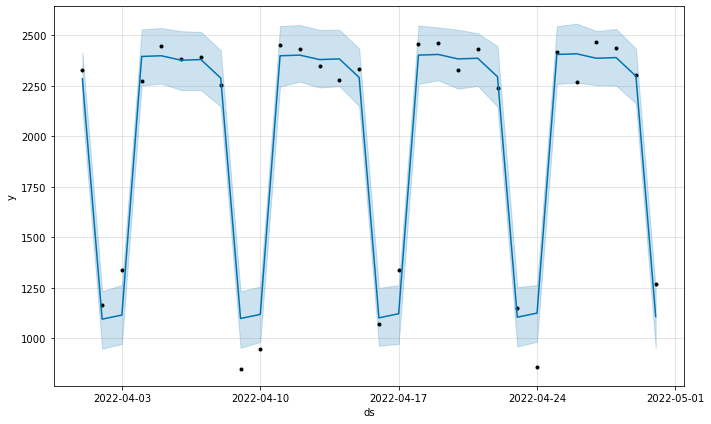

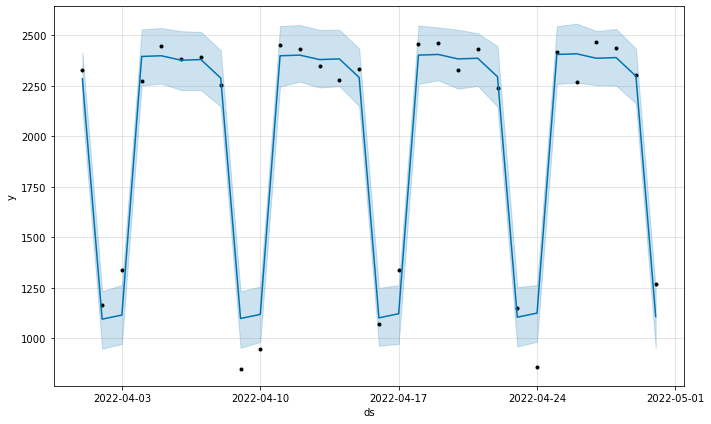

In [516]:
pro_test.plot(forecast_2)

/Users/ahmadzarzar/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


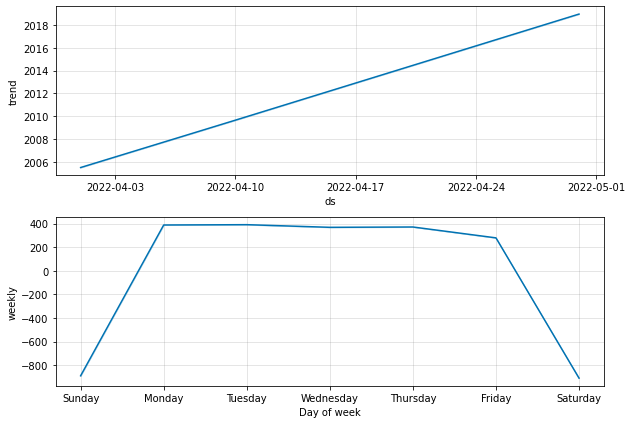

In [517]:
fig_2=pro_test.plot_components(forecast_2)

In [518]:
resultat_1= mean_absolute_error(test_data.y.values,forecast.yhat.values[:30])
resultat_1

719.995581265758

In [519]:
resultaat_2= mean_absolute_error(test_data.y.values,forecast_2.yhat.values[:30])
resultaat_2

84.04400626070874

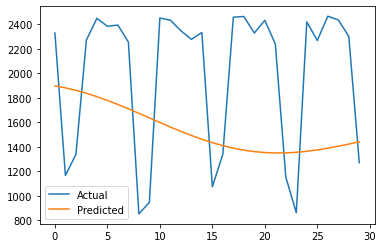

In [520]:
pyplot.plot(test_data.y.values, label='Actual')
pyplot.plot(forecast.yhat.values[:30], label='Predicted')
pyplot.legend()
pyplot.show()


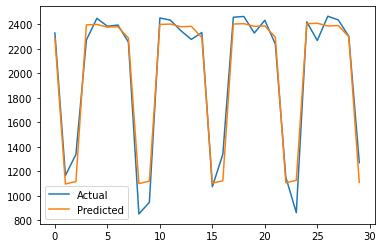

In [521]:
pyplot.plot(test_data.y.values, label='Actual')
pyplot.plot(forecast_2.yhat.values[:30], label='Predicted')
pyplot.legend()
pyplot.show()


### Gör en prognostisering för Juni 2022 och rita ut.

/Users/ahmadzarzar/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/ahmadzarzar/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


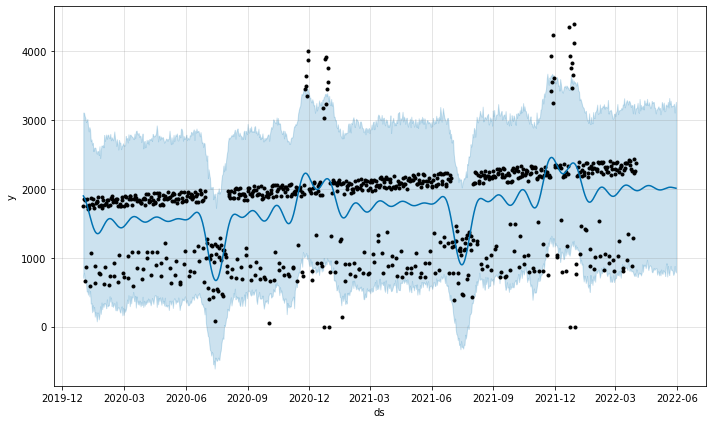

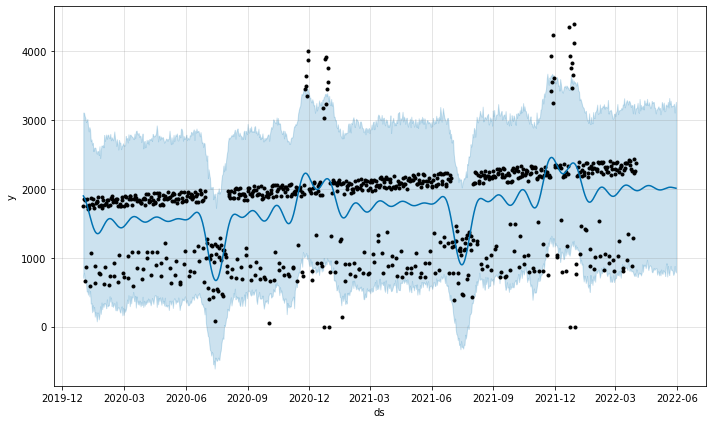

In [522]:
futres=model_pro.make_future_dataframe(periods=60)
juni=model_pro.predict(futres)
model_pro.plot(juni)